In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1,2.MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

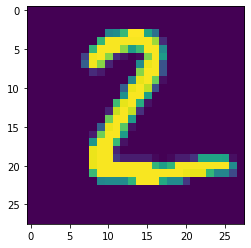

In [15]:
plt.imshow(x_test[1])

In [17]:
x_test[1].shape

(28, 28)

In [18]:
x_train = x_train / 255
x_test = x_test / 255
x_test = x_test.reshape(-1,784)
x_train = x_train.reshape(-1,784)
y_train_cl = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cl = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256,activation = 'relu',input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
x_train.shape

(60000, 784)

In [23]:
history = model.fit(x_train, y_train_cl, batch_size=16, epochs=10)

Epoch 1/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2110 - accuracy: 0.9395
Epoch 2/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1944 - accuracy: 0.9448
Epoch 3/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1801 - accuracy: 0.9488
Epoch 4/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1669 - accuracy: 0.9523
Epoch 5/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1553 - accuracy: 0.9554
Epoch 6/10
3750/3750 [==============================] - 9s 3ms/step - loss: 0.1447 - accuracy: 0.9584
Epoch 7/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1349 - accuracy: 0.9618
Epoch 8/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1267 - accuracy: 0.9639
Epoch 9/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1190 - accuracy: 0.9653
Epoch 10/10
3750/3750 [==============================] - 10s 3ms/step - los

In [24]:
y_pred = model.predict(x_test)

In [25]:
loss,accuracy = model.evaluate(x_test,y_test_cl,verbose = 1)

313/313 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9646


# 3.validation_split

In [27]:
history = model.fit(x_train, y_train_cl, batch_size=16, epochs=10,validation_split = 0.2)

Epoch 1/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1072 - accuracy: 0.9694 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 2/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1014 - accuracy: 0.9715 - val_loss: 0.0997 - val_accuracy: 0.9714
Epoch 3/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0967 - accuracy: 0.9722 - val_loss: 0.0946 - val_accuracy: 0.9724
Epoch 4/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0920 - accuracy: 0.9740 - val_loss: 0.0978 - val_accuracy: 0.9719
Epoch 5/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0878 - accuracy: 0.9750 - val_loss: 0.0946 - val_accuracy: 0.9730
Epoch 6/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0840 - accuracy: 0.9763 - val_loss: 0.0928 - val_accuracy: 0.9727
Epoch 7/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0798 - accuracy: 0.9779 - val_loss: 0.0878 - val_accur

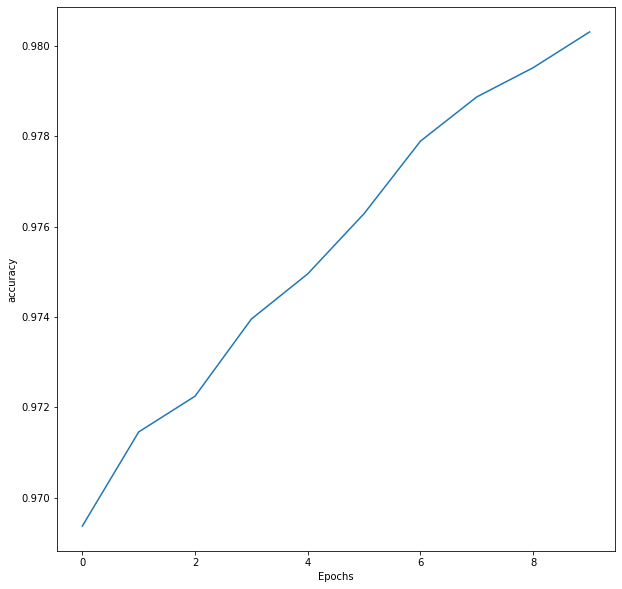

In [31]:
accuracy = history.history['accuracy']

fig = plt.figure(figsize=(10, 10))
plt.xlabel("Epochs")
plt.ylabel("accuracy")

plt.plot(accuracy)

# 4.Titanic

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df_main = pd.read_csv('Data/Lessons/data/titanic/train.csv')
Y = df_main['Survived']
X = df_main.loc[:, df_main.columns != 'Survived']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=1)

In [6]:
y_train_sc = tf.keras.utils.to_categorical(Y_train, num_classes=2)
y_test_sc = tf.keras.utils.to_categorical(Y_test, num_classes=2)

In [7]:
X_train = X_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
X_test = X_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [8]:
def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

In [9]:
X_train = prepare_num(X_train)
X_test = prepare_num(X_test)
X_test = X_test.fillna(X.median())
X_train = X_train.fillna(X.median())

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

In [11]:
x_train_sc.shape

(712, 12)

In [12]:
model_t = tf.keras.models.Sequential()
model_t.add(tf.keras.layers.Dense(64,activation = 'relu',input_shape=(12,)))
model_t.add(tf.keras.layers.Dense(2,activation = 'sigmoid'))
model_t.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [13]:
history_t = model_t.fit(x_train_sc, y_train_sc, batch_size=12, epochs=100)

Epoch 1/100
60/60 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.5772
Epoch 2/100
60/60 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.7654
Epoch 3/100
60/60 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.8244
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.8160
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.8118
Epoch 6/100
60/60 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.8132
Epoch 7/100
60/60 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.8216
Epoch 8/100
60/60 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.82 - 0s 1ms/step - loss: 0.1380 - accuracy: 0.8230
Epoch 9/100
60/60 [==============================] - 0s 1ms/step - loss: 0.1370 - accuracy: 0.8188
Epoch 10/100
60/60 [==============================] - 0s 1ms/step -

In [14]:
loss,accuracy = model_t.evaluate(x_test_sc,y_test_sc,verbose = 1)

6/6 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.7821
